# Linear Regression

The goal of this notebook is to build a LInear Regression Model to the California Housing Data.

We Will be trying to predict the MedianPrice per house in each block. Denoted as the target column. 

This price is in $100,000s

Previously we performed some initial data cleaning on this data and we will progress using that.



In [23]:
# importing pandas package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# loading our cleaned data into  data frames
# We can use these different cleaning methods to experiment with our model and see the impact
df = pd.read_csv('data/housing_data_cleaned.csv')
df_IQR = pd.read_csv('data/housing_data_cleaned_IQR.csv')
df_STD = pd.read_csv('data/housing_data_cleaned_STD.csv')

In [24]:
# verify our data frames looking at their info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20526 entries, 0 to 20525
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20526 non-null  float64
 1   HouseAge    20526 non-null  float64
 2   AveRooms    20526 non-null  float64
 3   AveBedrms   20526 non-null  float64
 4   Population  20526 non-null  float64
 5   AveOccup    20526 non-null  float64
 6   Latitude    20526 non-null  float64
 7   Longitude   20526 non-null  float64
 8   Target      20526 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [25]:
# verify our data frames looking at their info
df_STD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19358 entries, 0 to 19357
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      19358 non-null  float64
 1   HouseAge    19358 non-null  float64
 2   AveRooms    19358 non-null  float64
 3   AveBedrms   19358 non-null  float64
 4   Population  19358 non-null  float64
 5   AveOccup    19358 non-null  float64
 6   Latitude    19358 non-null  float64
 7   Longitude   19358 non-null  float64
 8   Target      19358 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [26]:
# verify our data frames looking at their info
df_IQR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16141 entries, 0 to 16140
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      16141 non-null  float64
 1   HouseAge    16141 non-null  float64
 2   AveRooms    16141 non-null  float64
 3   AveBedrms   16141 non-null  float64
 4   Population  16141 non-null  float64
 5   AveOccup    16141 non-null  float64
 6   Latitude    16141 non-null  float64
 7   Longitude   16141 non-null  float64
 8   Target      16141 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


### Recap on the Data Set

California Housing dataset
Data Set Characteristics:

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    
    - HouseAge      median house age in block group
    
    - AveRooms      average number of rooms per household
    
    - AveBedrms     average number of bedrooms per household
    
    - Population    block group population
    
    - AveOccup      average number of household members
    
    - Latitude      block group latitude
    
    - Longitude     block group longitude
    
This dataset was obtained from the StatLib repository. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

An household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surpinsingly large values for block groups with few households and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the :func:sklearn.datasets.fetch_california_housing function.

.. topic:: References

- Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
  Statistics and Probability Letters, 33 (1997) 291-297

### Moving forward we will use the Data with all outliers included. Once we have run through a model your task will be to rebuild using one of data sets with outliers removed and compare

In [27]:
#viewing the head of the df
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [28]:
# viewing the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20526 entries, 0 to 20525
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20526 non-null  float64
 1   HouseAge    20526 non-null  float64
 2   AveRooms    20526 non-null  float64
 3   AveBedrms   20526 non-null  float64
 4   Population  20526 non-null  float64
 5   AveOccup    20526 non-null  float64
 6   Latitude    20526 non-null  float64
 7   Longitude   20526 non-null  float64
 8   Target      20526 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


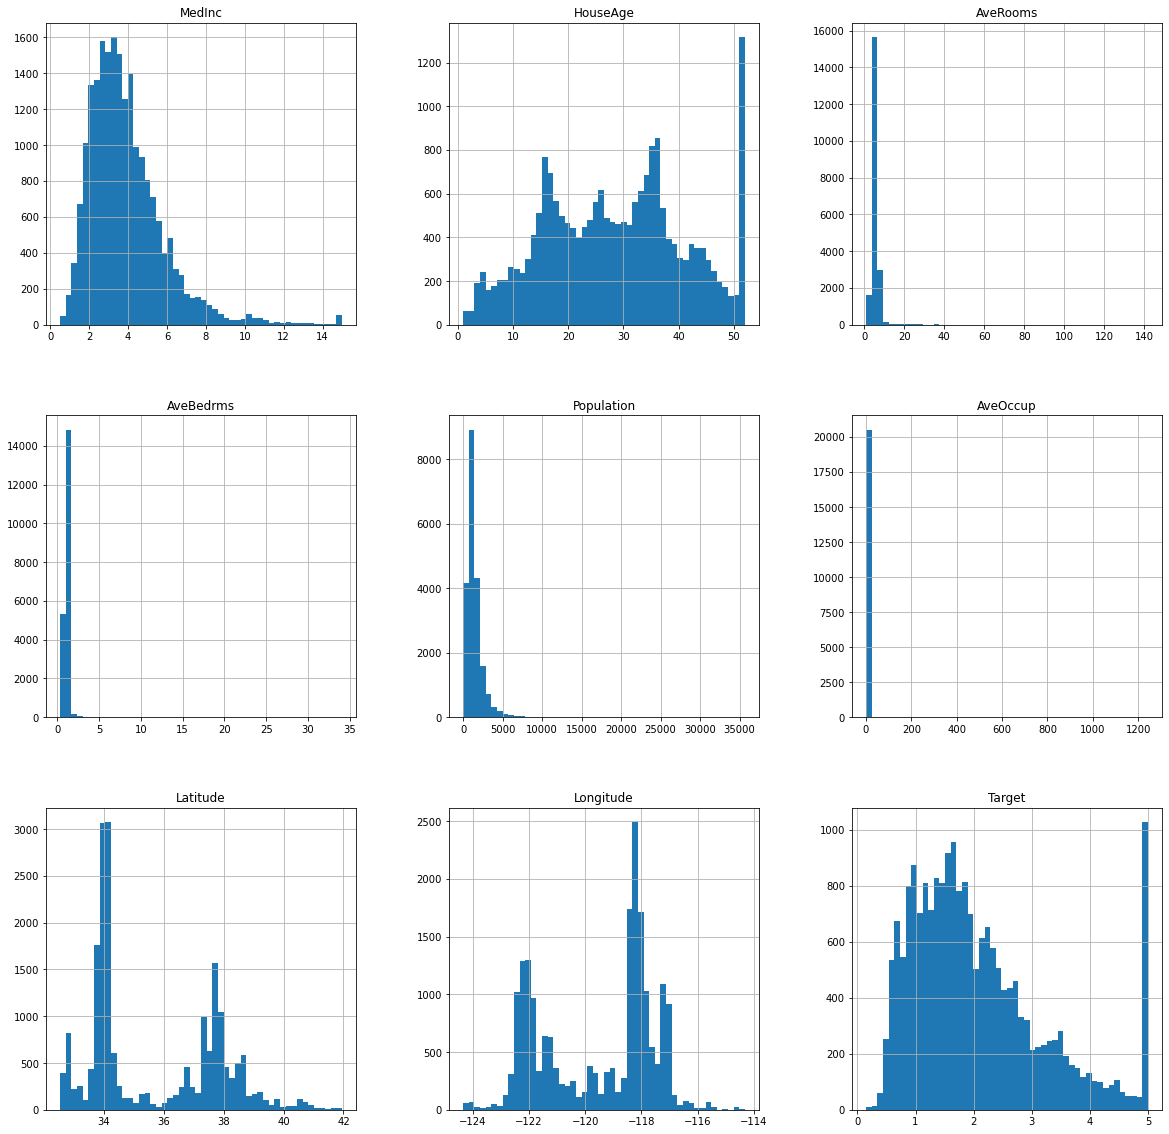

In [29]:
# viewing the distributions
df.hist(bins = 50, figsize=(20,20));

# Linear Regression assumptions

Linear regression assumes that each target variables are linearly correlated with the target variable
- We need to investiage this

No Multi colinearity, i.e none of the features are highly correlated
- We need to investiage this also

Independence
- We will assume this to be the case
 - (can use the Durbin-Watson test, to asses, but we will not be covering this)

There are some other assumptions that we can test for after fitting the model but we wont be covering those in this course
- Homoscedasticity, using Residual s vs Predicted values plots
- Multivariate Normality, using Q-Q plots
 - (There are more formal tests for Multivariate Normality but we will not be covering those, namely <br>
   Shapiro-Wilk, Kolmogorov-Smironov, Jarque-Barre, or D’Agostino-Pearson)

#### Assesing if features are linearly correlated with the target variable

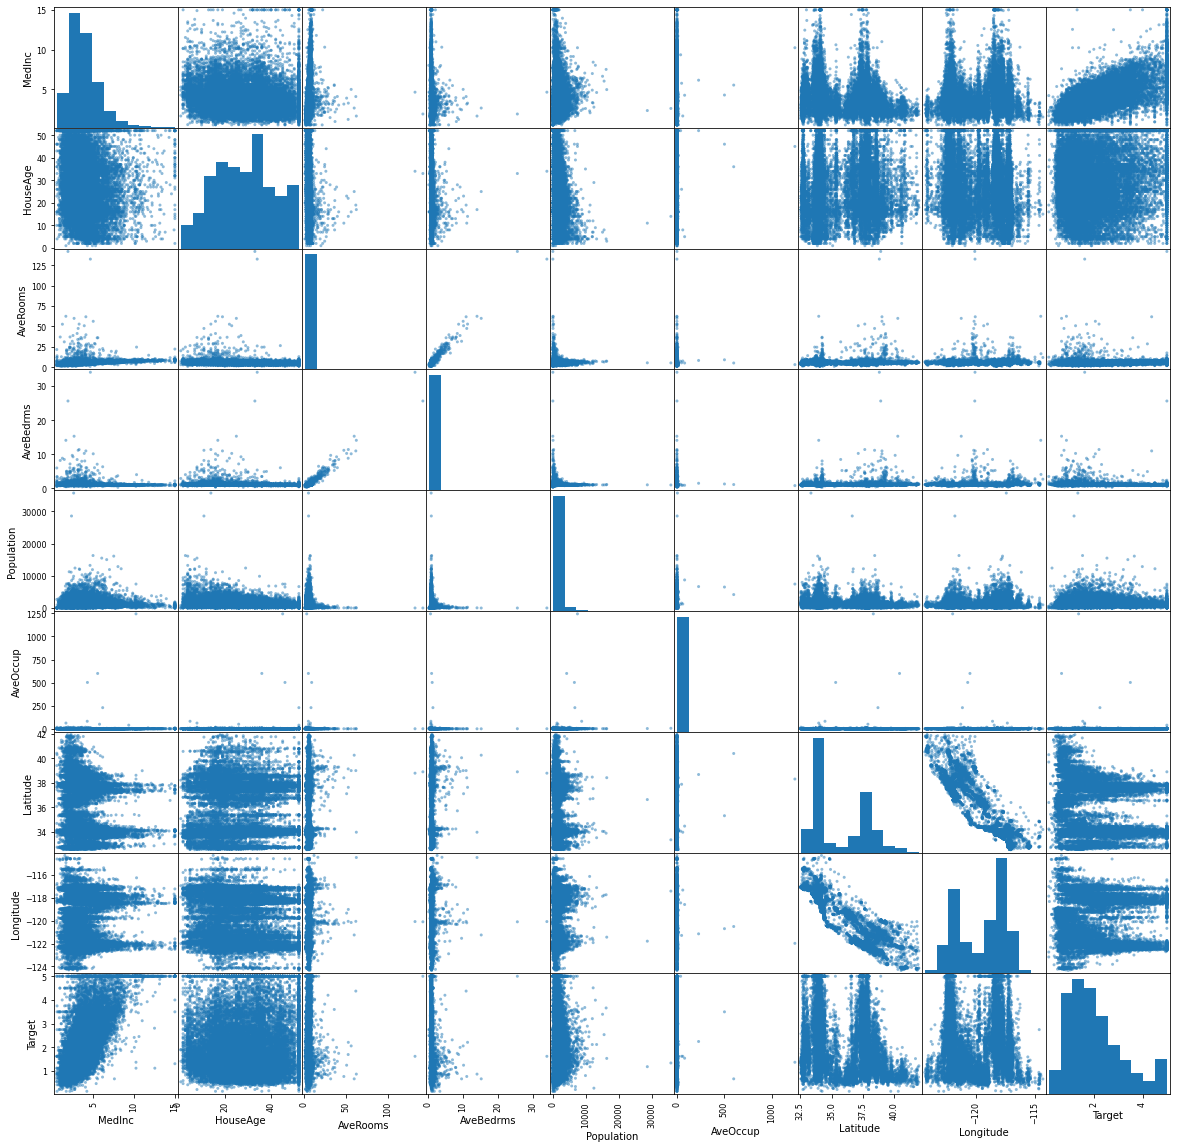

In [30]:
# plotting scatter of all columns against eachother
pd.plotting.scatter_matrix(df,figsize = (20,20));


#### Discuss what you can observe from above, solely related to correlation with the target variable?

#### Discuss what you observe related to correlation of the features them selves?

## Lets retrieve the correlation coefficients

#### We can use the basic Pnadas .corr() plot to see the <em>r</em>  values

The <b><i>r</b></i> value or Pearsons Correlation Coefficient is a measure of the linear interdependence between two variables, or two sets of data.

The Pearson correlation coefficient is probably the most widely used measure for linear relationships between two normal distributed variables and thus often just called "correlation coefficient". 

Usually, the Pearson coefficient is obtained via a Least-Squares fit and a value of 1 represents a perfect positive relation-ship, -1 a perfect negative relationship, and 0 indicates the absence of a relationship between variables.

Its calculation is below for completeness

$$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$$

In [31]:
# Note you do not need to worry about recaling the data calling pandas.corr()
# Pearsons Correlation is a normalised measure
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119482,0.326172,-0.062116,0.005339,0.018806,-0.080571,-0.014459,0.688334
HouseAge,-0.119482,1.000000,-0.153637,-0.078024,-0.295959,0.013175,0.011715,-0.108926,0.105217
AveRooms,0.326172,-0.153637,1.000000,0.848094,-0.072181,-0.004853,0.106166,-0.027177,0.151599
AveBedrms,-0.062116,-0.078024,0.848094,1.000000,-0.066472,-0.006180,0.069758,0.013441,-0.046934
Population,0.005339,-0.295959,-0.072181,-0.066472,1.000000,0.069936,-0.108706,0.099603,-0.024127
AveOccup,0.018806,0.013175,-0.004853,-0.006180,0.069936,1.000000,0.002555,0.002256,-0.023662
Latitude,-0.080571,0.011715,0.106166,0.069758,-0.108706,0.002555,1.000000,-0.924618,-0.144372
Longitude,-0.014459,-0.108926,-0.027177,0.013441,0.099603,0.002256,-0.924618,1.000000,-0.045807
Target,0.688334,0.105217,0.151599,-0.046934,-0.024127,-0.023662,-0.144372,-0.045807,1.000000


#### We can feed this into Seaborn to add more colour to our results with a heatmap

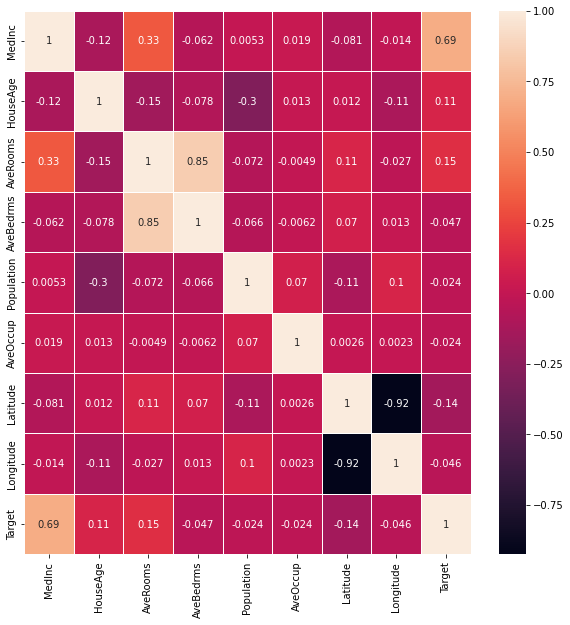

In [32]:
# Creating an axes on which to draw the heatmap
fig, ax =  plt.subplots(figsize = (10,10))

# Note: there is an exercise sheet on Matplot lib which you may find useful in understanding about figures and axes

# Plotting the heatmap on the axes
sns.heatmap(df.corr(), annot=True, linewidths=0.8, ax=ax);

- Median income has the highest correlation value 0.688 which indicates that it is strongly linked to the target variable.  

- Longitude and latitude have negative correlation as it is inversely proportional to the target variable.

- Can you explain what this means in real terms?
  
- Comment on all other <b><i>r</b></i> values

<details>
    <summary style="color:green;font-weight:bold">Thoughts</summary>
    
Blocks with higher median incomes have higher median house prices, to be expected
    
Logtitude and lattitdue being negatively correlated suggest that further south and east have higher house prices, we will visualize this later
    
Also they are heavily correlated together
    


    
    
    
    

#### Right now we are just interested in the correlation of each feature with the target variable so we can isolate this

In [33]:
# Calling the correlation method, but this time on just one column, rather than the whole DataFrame
df.corr()['Target'].sort_values(ascending = False)

Target        1.000000
MedInc        0.688334
AveRooms      0.151599
HouseAge      0.105217
AveOccup     -0.023662
Population   -0.024127
Longitude    -0.045807
AveBedrms    -0.046934
Latitude     -0.144372
Name: Target, dtype: float64

## The next step is to Re-Scale the data

We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points. 


- But before that we need to split the data

- If we rescale over the entire data, i.e before we split the data, we will induce what is referred to as <b><i>Data Leakage</b></i>, basically information from the test set will have an impact on our model building process.

Our training set cannot have any influence from the test set. If we rescaled using the test set also, this would affect the values in the trainig set

## Importance of the Train Test split and how it is done

It is crucial that we can test our model on data that it has not seen before in order to guage how well it may perform in the real world.

An important part of splitting the data is to ensure there is a broad range of of the target variable in each split.

If we did'nt ensure this, it is possible that we could Train our model on the lowest target values and then test it on the highest. This would severly bias our model and the underperformance would be a Reducible Error

Scikit-learns Test and train split ensures that we have a good spread of the target variable over both he training and test sets. 

We will split the data and observe

In [34]:
# Importing package
from sklearn.model_selection import train_test_split

#Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(df[['MedInc', 
                                                        'HouseAge', 
                                                        'AveRooms', 
                                                        'AveBedrms', 
                                                        'Population', 
                                                        'AveOccup',
                                                        'Latitude', 
                                                        'Longitude']],
                                                       df['Target'],
                                                    test_size=0.30,
                                                   random_state =42)

<AxesSubplot:>

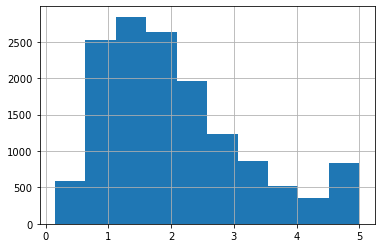

In [35]:
# visualising the distribution of the target in the training set
y_train.hist()

<AxesSubplot:>

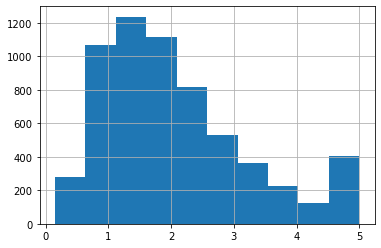

In [36]:
# visualising the distribution of the target in the training set
y_test.hist()

#### Wonderful!! we have near identical distributions in each set

This will ensure that we both train and test on a representitive range of the target variable

## Now we fit and apply scaling to our Training data, then apply this scaling algorithm to the Test data

We will be applying StandardScalar() to the data, this is transforming the data to thier Z scores, ensuring they have a mean of 0 and a Standard Deviation of 1.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

$$z= \frac{x - \mu}{\sigma}$$
<br>

<center>$z$ is the rescaled value </center>
<center>$x$ is the original value </center>
<center>$\mu$ is the mean </center>
<center>$\sigma$ is the standard deviation</center>

In this case we are manually scaling the target variable

The downside of this is we must reverse this transform later in order to get the error metrics

There are more sophisticaed methods to do this in Sci-Kit learn using Pipelines and Transformed Target Regressor

But we will progress by hand to understand what is happening

In [37]:
# importing the package
from sklearn.preprocessing import StandardScaler

# Calling the method twice, once for the features and once for the target
scaler =  StandardScaler()
scaler_target = StandardScaler()

In [38]:
# Sci-Kit learn returns an array by default, we will be putting the data into another dataframe, 
# Extracting the column names for this purpose
cols = list(X_train.columns)

In [39]:
# Fitting the scaler on the training features and applying it to both the training and test data
# Note how the Scaler is only fit to the training set, but then applied to both
X_train[cols] = scaler.fit_transform(X_train,y=y_train)
X_test[cols] = scaler.transform(X_test)

# Fitting the scaler on the training target and applying it to both the training and test data
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))


In [40]:
# Viewing the transformed training data
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.436800e+04,1.436800e+04,1.436800e+04,1.436800e+04,1.436800e+04,1.436800e+04,1.436800e+04,1.436800e+04
mean,2.351111e-16,7.864595e-17,2.102493e-16,2.017138e-16,6.556405e-17,3.550146e-17,-1.474778e-15,5.222963e-15
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.777615e+00,-2.196048e+00,-1.921045e+00,-1.645029e+00,-1.263472e+00,-2.059907e-01,-1.453962e+00,-2.375631e+00
25%,-6.923755e-01,-8.419115e-01,-4.155786e-01,-1.954876e-01,-5.623328e-01,-5.470871e-02,-7.999068e-01,-1.107984e+00
50%,-1.759262e-01,3.429472e-02,-8.578868e-02,-1.040303e-01,-2.282866e-01,-2.133226e-02,-6.457366e-01,5.339673e-01
75%,4.593174e-01,6.715356e-01,2.635448e-01,6.129963e-03,2.721128e-01,1.879337e-02,9.660419e-01,7.835040e-01
max,5.865392e+00,1.866362e+00,5.377037e+01,7.103526e+01,3.060400e+01,1.076425e+02,2.942223e+00,2.635067e+00


In [41]:
# Viewing the transformed test data
X_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000,6158.000000
mean,-0.002836,0.019523,0.000036,0.000304,0.021110,0.001016,-0.032489,0.035464
std,1.006589,1.008336,1.154803,1.077031,1.033506,0.623573,0.994816,1.000353
min,-1.777615,-2.196048,-1.939124,-1.555256,-1.261686,-0.164590,-1.444618,-2.310752
25%,-0.688198,-0.841912,-0.424693,-0.195561,-0.564119,-0.056458,-0.804579,-1.061820
50%,-0.180986,0.034295,-0.083514,-0.101731,-0.218462,-0.022268,-0.664424,0.561416
75%,0.455825,0.671536,0.263089,0.005105,0.276132,0.018533,0.961370,0.803467
max,5.865392,1.866362,57.736728,52.871716,13.297011,43.342426,2.881489,2.555215


In [42]:
# observing for the target 
print(y_train.std(), y_train.mean())
print(y_test.std(), y_test.mean())

1.0 3.0290049112824425e-17
1.0140602141637018 0.0053275420624213955


## Lets build our first model

We will begin with a simple linear model with one input variable or feature

In [43]:
# Viewing columns that can be selected as features for our model
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [44]:
# Setting the features that we will use
cols = ['MedInc']

More info on the model and parameters available<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [45]:
# import the necessary package
from sklearn.linear_model import LinearRegression

# call the method
regressor = LinearRegression(fit_intercept = False)

# Fit the model
regressor.fit(X_train[cols],y_train)

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])

In [46]:
# Viewing the predictions
y_pred

array([[ 0.44510317],
       [-0.21277467],
       [-0.28493486],
       ...,
       [-0.42704661],
       [-1.13148643],
       [-0.45163104]])

# What just happened?


Scikit-Learn built a simple linear regression on the standardised training data, we then used the test data to make predictions, hence testing the model on data it had not seen before.

Below we will display the training data and the model created.

<center>Simple linear regression</center>

$$ y = mx+c $$ 
    
<br>
<center>$y =$ target</center>
<center>$x =$ MedInc</center>
<center>$m =$ Coefficient (gradient) from the model</center>
<center>$c =$Intercept</center> 
<center>which will be (0,0) as we standardized all our scores, i.e both X and Y have a mean of zero</center>

In [47]:
# accessing model coefficient, the gradient
regressor.coef_

array([[0.68691041]])

In [48]:
# accessing intercept
regressor.intercept_

0.0

In [49]:
# accessing feature used
regressor.feature_names_in_

array(['MedInc'], dtype=object)

# Plotting Model against training data

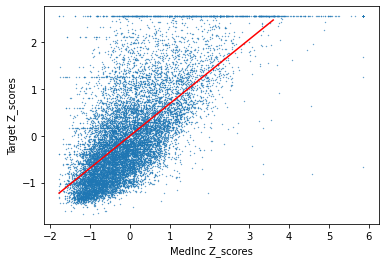

In [52]:
# Plotting MedInc against the Target
plt.scatter(X_train[cols], y_train, s=0.1)


# Selecting x values to input into the model
# Started at the min value of MedInc that we have, 
# the upper limit was found by experimenitng so as not to exceed the y value
# in this case the linear model is very poor at predicting anything over a standardised x value of over 3
x = np.linspace(X_train[cols].min(),3.6,100)

# Using the gradient and intercept from the model to plot 
# The intercept is zero but it is added for completeness
y = (regressor.coef_)*x+(regressor.intercept_)

# Plotting the linear model
plt.plot(x, y, '-r')

# Adding labels to each axis
plt.xlabel('MedInc Z_scores')
plt.ylabel('Target Z_scores')

# calling the plot
plt.show()


# Plotting model against Test Data

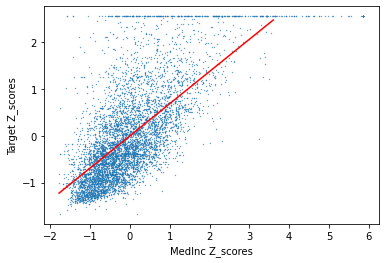

In [53]:
# Same as above
# notice the difference in the scatter plot

plt.scatter(X_test[cols], y_test, s=0.1)
x = np.linspace(X_train[cols].min(),3.6,100)
y = (regressor.coef_)*x+(regressor.intercept_)

plt.plot(x, y, '-r', label='Model')
plt.xlabel('MedInc Z_scores')
plt.ylabel('Target Z_scores')
plt.show()

#### Assesing the model

As we have scaled the target variable, it makes sense to descale it to measure the RMSE, Root Mean Square error of the model

If we leave it scaled the units won't make sense, however after we convert it back and find the RMSE then the error is in the same units as the data was in the first place

In [54]:
# first we need to reverse the transformation so we have meanginful results
# calling inverse_transform on our scaler
y_true = scaler_target.inverse_transform(y_test)
y_pred_inverse = scaler_target.inverse_transform(y_pred)

Now to measure the errors

These errors are the differences from our predicted target values to the actual target values of the test set

In [55]:
# Import the necessary packages
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating the errors
mae = mean_absolute_error(y_true, y_pred_inverse)
mse = mean_squared_error(y_true, y_pred_inverse)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred_inverse)

In [56]:
# Viewing these results
print('MAE = ', mae)
print('MSE = ', mse)
print('RMSE = ', rmse)
print('R^2 = ', r2)

MAE =  0.6304751738605809
MSE =  0.7091215565671919
RMSE =  0.8420935557093356
R^2 =  0.4781895067549258


In [57]:
# We can view the coefficients of the features
regressor.coef_

array([[0.68691041]])

In [58]:
# The feature names included
regressor.feature_names_in_

array(['MedInc'], dtype=object)

These results are in line with what we found before using the correlation matrix<br>
The $r^2$ value is roughly the square of the correlation coefficitent of 0.688 that we originally got.



# Multi-Linear Regression

We will now add in another variable and see its impact on the errors

In [59]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [60]:
cols =['MedInc','AveRooms']

In [61]:
# call the method
regressor = LinearRegression( fit_intercept = False)

# Fit the model
regressor.fit(X_train[cols],y_train)

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])

# first we need to reverse the transformation so we have meanginful results
y_true = scaler_target.inverse_transform(y_test)
y_pred = scaler_target.inverse_transform(y_pred)

# Calculating the errors
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred)

# Viewing these results
print('MAE = ', mae)
print('MSE = ', mse)
print('RMSE = ', rmse)
print('R^2 = ', r2)

MAE =  0.6236090966342311
MSE =  0.7096007409915699
RMSE =  0.8423780273675056
R^2 =  0.4778368966015263


By adding in AveRooms, we made minimal difference to the model

## Trying different combinations of features

By using some built in methods in Python we can experiment with different combinations of features and asses the quality of the model.<br>
Below I will try every possible combination of 2 features and record the RMSE for each.

When finsihed we will look at the top and bottom 5 combinations

The method used will be <em>combinations</em> from the built in <em>itertools</em> package <br> You can find out more here<br>https://www.geeksforgeeks.org/itertools-combinations-module-python-print-possible-combinations/

In [70]:
# Quick demo
# importing required packages
from itertools import combinations

# Combinations takes two arguments
# The first is  some kind if iterable
# The second, how many items we can have in our combinations
# print(list(combinations('word',2)))


# experiment with the code below
possibilities = list(combinations(['A','B','C','D'],2))
possibilities

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

In [503]:
# Importing required packages
from itertools import combinations

# Creating a list of all columns
all_features = list(X_train.columns)

# List of all possible combinations of 2 columns
sub_set = list(combinations(all_features,2))

# creating an empty dict to store results in
results = {}

# looping over each item in the seb set, which is a tuple containing a pair of column names
for features in sub_set:
    
    # creating a list from this tuple which will make it easier to select the columns from pandas
    # when selecting columns in pandas you need to supply it with a list
    cols = list(features)

    # call the method
    regressor = LinearRegression( fit_intercept = False)

    # Fit the model
    regressor.fit(X_train[cols],y_train)

    # Carry out predictions on our test set
    y_pred = regressor.predict(X_test[cols])

    # first we need to reverse the transformation so we have meanginful results
    y_true = scaler_target.inverse_transform(y_test)
    y_pred = scaler_target.inverse_transform(y_pred)

    # Calculating the errors
    # Only RMSE is needed right now, but the rest are here for completeness
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    # Calculting the R^2
    r2 = r2_score(y_true, y_pred)
    
    # Creating an entry in the results dictionary
    # The ket is the column names
    # The value is the RMSE
    results[str(cols)] = rmse

    
# After we have looped through all combinations and saved thee values to the dict
# A dataframe is created from the dict
df_results = pd.DataFrame.from_dict(results, orient = 'index')

# The dataframe uses the keys as the index, i dont want this so i reset the index
df_results.reset_index(inplace=True)

# Rename the columns to reflect their content
df_results.columns = ['Features','RMSE']

# Sort by RMSE
df_results.sort_values(by='RMSE', inplace=True);

In [504]:
df_results.head()

,Features,RMSE
0,"['MedInc', 'HouseAge']",0.813775
5,"['MedInc', 'Latitude']",0.836798
6,"['MedInc', 'Longitude']",0.840795
3,"['MedInc', 'Population']",0.841441
4,"['MedInc', 'AveOccup']",0.841952


In [505]:
df_results.tail()

,Features,RMSE
26,"['AveOccup', 'Longitude']",1.164141
21,"['AveBedrms', 'Longitude']",1.164433
22,"['Population', 'AveOccup']",1.165361
18,"['AveBedrms', 'Population']",1.165573
19,"['AveBedrms', 'AveOccup']",1.165804


#### It seems reasonable that if we chose a model with 2 features, we should select MedInc and HouseAge
- The have correlation with the target variable
- Adding HouseAge, that has low correltion with the target variabl on its own, does seem to help the model
- There is no multicolinearity between them

## Task
### Iterate through other combinations of features and record their RMSE in a Data Frame as above

#### Extension , see if you can loop through all possible combinations

<details>
    <summary style="color:green;font-weight:bold">Solution</summary>

    all_features = list(X_train.columns)

    results = {}

    for number_of_features in range(1,len(X_train.columns)+1):
        print('first_loop')


        sub_set = list(combinations(all_features,number_of_features))


        for features in sub_set:

            cols = list(features)

            # call the method
            regressor = LinearRegression( fit_intercept = False)

            # Fit the model
            regressor.fit(X_train[cols],y_train)

            # Carry out predictions on our test set
            y_pred = regressor.predict(X_test[cols])

            # first we need to reverse the transformation so we have meanginful results
            y_true = scaler_target.inverse_transform(y_test)
            y_pred = scaler_target.inverse_transform(y_pred)

            # Calculating the errors
            mae = mean_absolute_error(y_true, y_pred)
            mse = mean_squared_error(y_true, y_pred)
            rmse = np.sqrt(mse)

            # Calculting the R^2
            r2 = r2_score(y_true, y_pred)

            results[str(cols)] = rmse

    df_results = pd.DataFrame.from_dict(results, orient = 'index')
    df_results.reset_index(inplace=True)
    df_results.columns = ['Features','RMSE']
    df_results.sort_values(by='RMSE', inplace=True);

# The lowest RMSE we get is with all features combined.

However the differences are very small.

We may get further improvements if we combined Longtitude and Lattitude somehow as they are heavily correlated, and eliminating multi-colinearity should help our models performance.

This will be left for you to think about and take away with you.

Below I have plotted Longtitude against Lattitude, colured by the target.

It is clear that properties closer to the sea are more expensive.


Could we combine these coordinates in a way to classify if blocks were near the sea or not?





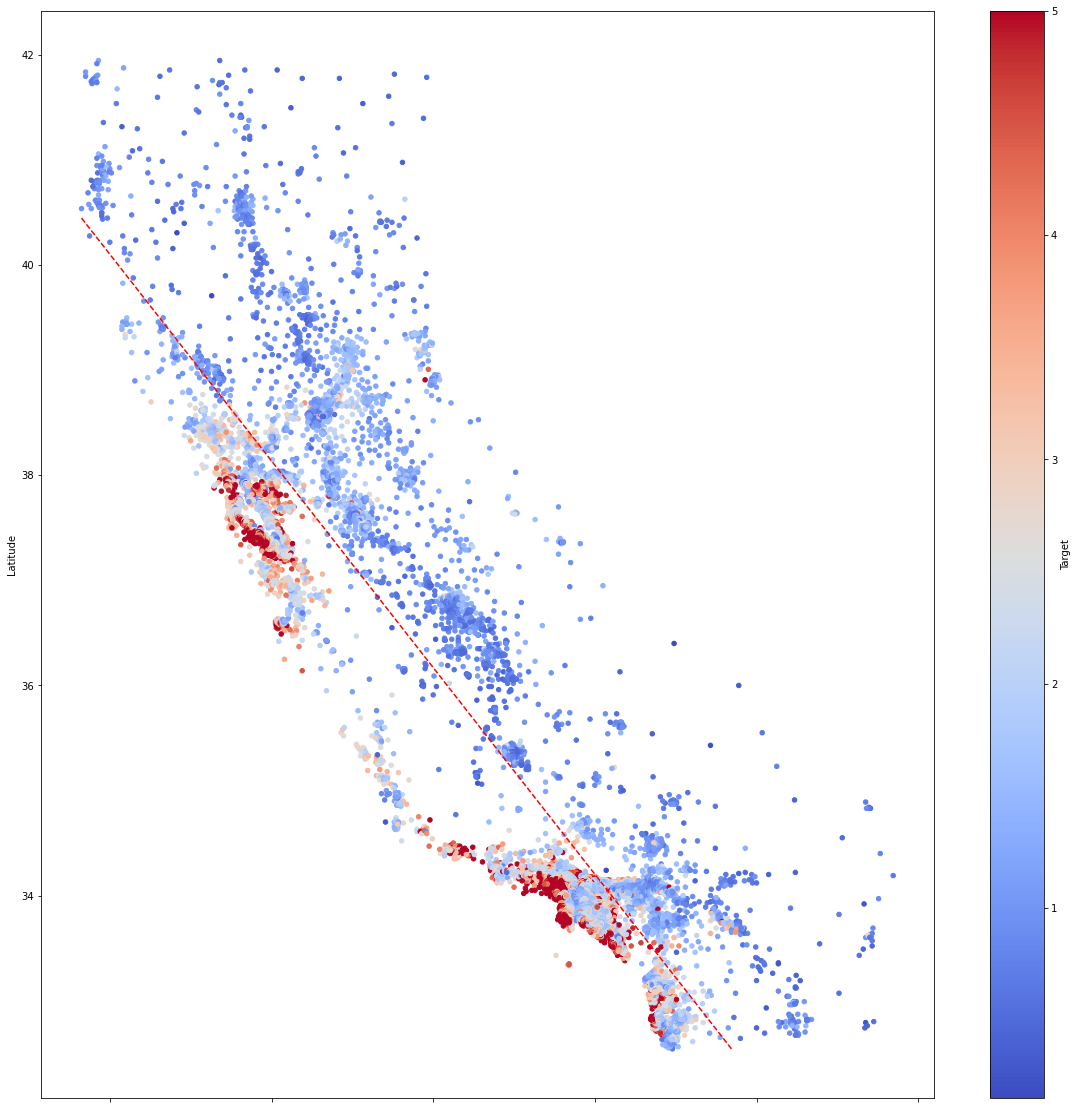

In [71]:
# Plotting Longitude against Latitude
# coloured by the target variable and setting the colour map
df.plot.scatter(x='Longitude' , 
                y = 'Latitude', 
                c='Target',
                cmap = 'coolwarm', 
                figsize = (20,20))


# I experimented with some lines to see if I could draw a boundary that may help with classifying the locations
# This is quite a crude method, but it would be a starting point to change the measuremnts of Long and Lat
# To close to or far from the sea
# A better way would be to verify with some geographical data
point1 = [df['Longitude'].min(), df['Latitude'].max()-1.5]
point2 = [df['Longitude'].max()-2, df['Latitude'].min()]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]


plt.plot(x_values, y_values, 'r', linestyle="--")
plt.show()

###  Extension Task

You can try rebuilding the model with the data sets with outliers removed too see the difference in the models performances

In [509]:
df_STD.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [510]:
df_IQR.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
1,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
2,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
3,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
4,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
